# Crossover analysis for Evolutionary Algorithms

In [1]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from alg import *
from utils import *

In [2]:
num_trials = 5
pop_size = 50
max_iters = 200
resources = [5, 10, 20]

def three_point_crossover(x, y):
    return npoint_crossover(x, y, n=3)

crossovers = [one_point_crossover, two_point_crossover, three_point_crossover, uniform_crossover]

def eval_lpt(R, get_instance):
    _, m, r, = lpt(R, p=get_instance(R))
    return m / r, m

def makespan(R, p, xover):
    _, m = evolve(
        R=R,
        p=p,
        mate=xover,
        mutate=mutation(vec_tweak, R),
        pop_size=pop_size,
        max_iters=max_iters,
        penalize=False,
    )
    return m

def evaluate(xover, get_instance):
    for R in resources:
        yield sum(makespan(R, get_instance(R), xover) for _ in range(num_trials)) / num_trials

## Comparison on random instance
TODO

In [3]:
#lpt_df = pd.DataFrame(data=(eval_lpt(R, sample_instance) for R in resources), index=resources, columns=['opt-bound', 'lpt'])
#(lpt_df['lpt'] - lpt_df['opt-bound']).plot.bar(xlabel='#resources', ylabel='quality(LPT) - quality(opt-bound)', title='Worst-case sub-optimality of LPT')

In [4]:
# ea_df = pd.DataFrame({xover.__name__: evaluate(xover, sample_instance) for xover in crossovers}, index=resources)
# ea_df

In [5]:
# pd.concat([lpt_df, ea_df], axis=1).max()

In [6]:
# lpt_ratio_df = ea_df.sub(lpt_df['opt-bound'], axis=0).div(lpt_df.lpt, axis=0)
# lpt_ratio_df.plot.barh(xlabel='quality/quality(LPT)', ylabel='#resources (R)', title='Ratio to LPT on SAMPLE_INSTANCE')

## Comparison on sub-optimal instance

In [7]:
lpt_df = pd.DataFrame(data=(eval_lpt(R, suboptimal_instance) for R in resources), index=resources, columns=['opt-bound', 'lpt'])
ea_df = pd.DataFrame({xover.__name__: evaluate(xover, suboptimal_instance) for xover in crossovers}, index=resources)

pd.concat([lpt_df, ea_df], axis=1)

,opt-bound,lpt,one_point_crossover,two_point_crossover,three_point_crossover,uniform_crossover
5,13.571429,19.0,15.6,16.0,16.0,15.4
10,28.536585,39.0,33.2,34.2,34.4,34.0
20,58.518519,79.0,73.4,75.0,72.8,74.6


<AxesSubplot:title={'center':'Ratio to LPT on sub-optimal instance'}, ylabel='quality/quality(LPT)'>

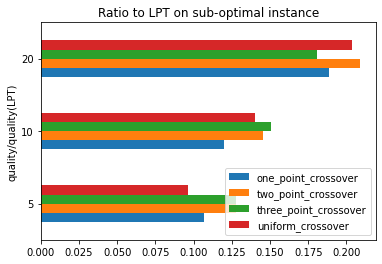

In [8]:
lpt_ratio_df = ea_df.sub(lpt_df['opt-bound'], axis=0).div(lpt_df.lpt, axis=0)
lpt_ratio_df.plot.barh(xlabel='quality/quality(LPT)', ylabel='#resources (R)', title='Ratio to LPT on sub-optimal instance')